In [102]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential  #layerlari lineer olarak bir araya getirir
from keras.layers import Dense, Embedding, LSTM  # Dense layerdaki noronlarin birbirine baglanmasini saglar
from keras.models import load_model
from keras.utils.np_utils import to_categorical
import re
import seaborn as sn
from matplotlib import pyplot

In [103]:
turkish_characters = "a|b|c|ç|d|e|f|g|ğ|h|ı|i|j|k|l|m|n|o|ö|p|r|s|ş|t|u|ü|v|y|z|0-9"
data = pd.read_csv('equal_duygu.csv',sep=',')
#for x in data['Yorum']:
   # print(x)#data['Yorum'][0]

In [104]:
data.isnull().values.any()  # Do we have missing data?

False

In [116]:
data = data[['Yorum','Duygu']]
#open('turkce-stop-words', 'r').read().split()

In [117]:
def remove_stopwords(df_data):
    stopwords = open('turkce-stop-words', 'r').read().split()
    df_data['stopwords_removed'] = list(map(lambda doc:
        [word for word in doc if word not in stopwords], df_data['Yorum']))

remove_stopwords(data)
#data['stopwords_removed'][0]

In [108]:
#type(data[0])
type(data['Yorum'])

pandas.core.series.Series

In [109]:
# Veri Setinin temizlenmesi.
data['Yorum'] = data['Yorum'].apply(lambda x: x.lower())
data['Yorum'] = data['Yorum'].apply((lambda x: re.sub('[^'+turkish_characters+'\s]','',x)))


In [110]:
# Veri setimizin işlenebilmesi için text verileri numaralara çevirmemiz gerekir.
# Keras bu işlem için hazır bir mekanizma sunmaktadır.
# Tokenizer sınıfı data içerisinde verilen cümleleri analiz ederek. Kelimelerin sıklıklarını hesaplar.
# Parameter: num_words = En sık geçen 250 kelimeye odaklan. Diğerleri önemli değil
tokenizer = Tokenizer(split=' ',num_words=2500)
# Her bir kelimenin sıklığını(frekansını) hesaplar.
tokenizer.fit_on_texts(data['Yorum'].values)
# Tüm cümleler tam sayı dizisine dönüştürülür.
X = tokenizer.texts_to_sequences(data['Yorum'].values)
encoded_docs = X
# Bütün metinlerimiz 400 sütundan oluşan bir dizi ile temsil edilecek.
# Çok kısa metinler 0'lar ile doldurulacak. Çok uzun metinler ise kesilecek.
X = pad_sequences(X,maxlen=400)

In [111]:
print(tokenizer.word_index["dahi"])
#print(tokenizer.word_counts)
#dict.has_key(key)  # to check any key dic have or not

387


In [57]:
print(data['Yorum'].values[0])
print(encoded_docs[0])
print(X[0])

çarşamba günü sipariş verdim orda yaizıyor salı gunu gelcek hani 24 saate kargodaydı
[1561, 185, 152, 128, 1562, 1563, 586, 587, 1564, 821, 822, 440, 1565]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   

In [58]:
embed_dim = 128
lstm_out = 128
def build_model():
    model = Sequential()
    # Her bir kelimenin temsil edileceği vektör boyutu. Bu örnek için her bir kelime 128 boyutunda
    # bir vektör ile temsil edilir.
    #?Embedding LTSM and Dense nedir farklarina bakilacak
    model.add(Embedding(2500, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
    model.add(Dense(128,activation='relu'))  # 2 noron sayisi
    model.add(Dense(2,activation='softmax'))  # 2 noron sayisi
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    #optimizer =  ogrenme oranini kontrol eder, ogrenme orarnin ne kadar hizli hesaplanancaginin kontrol eder
    #metrics = modelin ne kadar iyi tahmin yaptiginin soyler
    return model

Sequential groups a linear stack of layers into a tf.keras.Model.

Sequential provides training and inference features on this model.

In [59]:
# Çıktılarımızı kategorik hale getirdik. (Opsiyonel)
Y = pd.get_dummies(data['Duygu']).values
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0,

In [118]:
# Verinin %80'i train, %20'si test verisi olacak şekilde ayrılır.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)
#random state =Controls the shuffling applied to the data before applying the split.

model = build_model()
# Oluşturulan model train verileri ile eğitilir. Yapay Sinir Ağı eğitilmeye başlar.
# nb_epoch: İterasyon sayısı
#batch_size : model egitilirken kacar orenek alinacaginin soylera

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine', 'accuracy'])

history = model.fit(X_train, Y_train, epochs = 7 , batch_size=32, verbose = 2, validation_split = 0.1)
# Train verileri ile model eğitildikten sonra test dataları ile doğruluk oranlarına bakılır.
#By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
#Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch.
#You can do this by setting the validation_split argument on the fit() function to a percentage of the size of your training dataset.

#validation_split says: "hey give me all the input data – I will take care of splitting between test and validation".
#validation_data says "please give me explicitly the validation data"

score = model.evaluate(X_test, Y_test, verbose = 2)
print("score: %.2f" % (score[1]))

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 324 samples, validate on 36 samples
Epoch 1/7
 - 7s - loss: 0.2444 - mse: 0.2444 - mae: 0.4940 - mape: 247001728.0000 - cosine: 0.7150 - accuracy: 0.6512 - val_loss: 0.2131 - val_mse: 0.2131 - val_mae: 0.4537 - val_mape: 226865600.0000 - val_cosine: 0.7576 - val_accuracy: 0.7222
Epoch 2/7
 - 6s - loss: 0.2248 - mse: 0.2248 - mae: 0.4627 - mape: 231374448.0000 - cosine: 0.7420 - accuracy: 0.6914 - val_loss: 0.2040 - val_mse: 0.2040 - val_mae: 0.4460 - val_mape: 222976000.0000 - val_cosine: 0.7706 - val_accuracy: 0.7222
Epoch 3/7
 - 6s - loss: 0.1591 - mse: 0.1591 - mae: 0.3826 - mape: 191285936.0000 - cosine: 0.8279 - accuracy: 0.8426 - val_loss: 0.1249 - val_mse: 0.1249 - val_mae: 0.3072 - val_mape: 153611872.0000 - val_cosine: 0.8641 - val_accuracy: 0.8333
Epoch 4/7
 - 6s - loss: 0.0749 - mse: 0.0749 - mae: 0.2091 - mape: 104551448.0000 - cosine: 0.9208 - accuracy: 0.9074 - val_loss: 0.0943 - val_mse: 0.0943 - val_mae: 0.2310 - val_mape: 115506224.0000 - val_cosine: 0.8974 - 

Batch size is a term used in machine learning and refers to the number of training examples utilised in one iteration. The batch size can be one of three options:

batch mode = where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent
mini-batch mode = where the batch size is greater than one but less than the total dataset size. Usually, a number that can be divided into the total dataset size.
stochastic mode = where the batch size is equal to one. Therefore the gradient and the neural network parameters are updated after each sample.

In practice:

Batch mode: long iteration times
Mini-batch mode: faster learning
Stochastic mode: lose speed up from vectorization

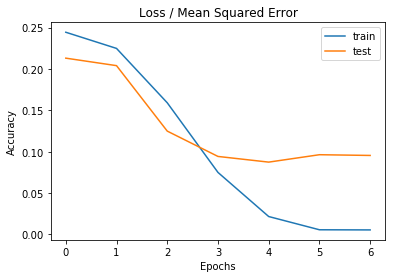

In [119]:

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

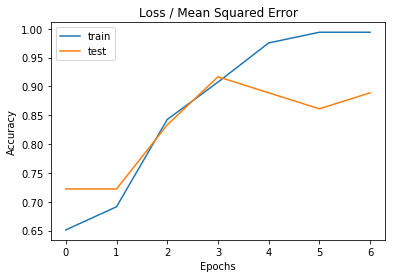

In [120]:

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

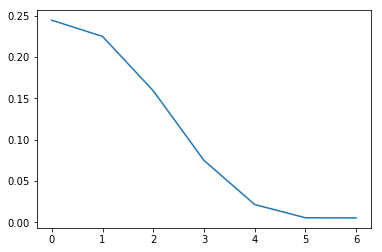

In [128]:
pyplot.plot(history.history['mse']) #mean squared error
#pyplot.plot(history.history['mae']) #mean absolute error
#pyplot.plot(history.history['mape']) #mean absolute percentage error
#pyplot.plot(history.history['cosine']) # cosine
pyplot.show()

In [122]:
X_train.shape , X_test.shape

((360, 400), (40, 400))

In [123]:
Y_train.shape , Y_test.shape

((360, 2), (40, 2))

In [124]:
X_train.var(), X_test.var()

(42203.86093269091, 34242.08945702735)

In [125]:
# Save Model
model.save("equal_duygu_model.h5")


In [126]:
# Load Model. Daha önce eğitilmiş olan model. Veriseti yada model parametreleri değişirse
# bu model geçersiz olur. Eğitim işlemi uzun sürdüğü için ağı bir defa eğitip oluşan modeli kaydettim.
model = load_model("equal_duygu_model.h5")

In [127]:
my_text = ["çarşamba günü sipariş verdim orda yaizıyor salı gunu gelcek hani 24 saate kargodaydı",
           "bozuk",
           " hiç beğenmedim",
           "süper",
           "kötü" 
           "daha iyi olabilir",
           "Bugun kargoya verilmesi gerekirken satıcı kargolama yapmamış.",
           "Telefon çok güzel herkese öneririm",
           "kamerası kötü görünüşü iyi diye aldık yanıldım"]

# Verilen örnekler Tokenizer yapısı ile tam sayı dizisine dönüştürülür
# Daha sonra eğitilen modele sırayla verilerek anlam analizi sonuçları elde edilir.
# Her Cümlenin yüzde kaç olumlu ve olumsuz olduğuna dair bilgiler çıktı olarak verilir.
sequences = tokenizer.texts_to_sequences(my_text)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.00589387 0.9941062 ]
 [0.25755548 0.7424445 ]
 [0.9100167  0.08998325]
 [0.0220378  0.97796226]
 [0.11724108 0.8827589 ]
 [0.99741924 0.00258073]
 [0.00947183 0.9905282 ]
 [0.7739637  0.22603631]]


Epoch is the number of passes over the data. Loss is the error over the training set typically in terms of mean squared error (for regression) or log loss (for classification).

Epoch: A full pass over all of your training data.

For example, in your view above, you have 1213 observations. So an epoch concludes when it has finished a training pass over all 1213 of your observations.

Loss: A scalar value that we attempt to minimize during our training of the model. The lower the loss, the closer our predictions are to the true labels.

This is usually Mean Squared Error (MSE) as David Maust said above, or often in Keras, Categorical Cross Entropy



What you'd expect to see from running fit on your Keras model, is a decrease in loss over n number of epochs. Your training run is rather abnormal, as your loss is actually increasing. This could be due to a learning rate that is too large, which is causing you to overshoot optima.

As jaycode mentioned, you will want to look at your model's performance on unseen data, as this is the general use case of Machine Learning.

As such, you should include a list of metrics in your compile method, which could look like:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
As well as run your model on validation during the fit method, such as:

model.fit(data, labels, validation_split=0.2)

# Worked Example

Finally, let’s make this concrete with a small example.

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

# Accuracy and Validation Accuracy


When training a machine learning model, one of the main things that you want to avoid would be overfitting. This is when your model fits the training data well, but it isn't able to generalize and make accurate predictions for data it hasn't seen before.

To find out if their model is overfitting, data scientists use a technique called cross-validation, where they split their data into two parts - the training set, and the validation set. The training set is used to train the model, while the validation set is only used to evaluate the model's performance.

Metrics on the training set let you see how your model is progressing in terms of it's training, but it's metrics on the validation set that let you get a measure of the quality of your model - how well it's able to make new predictions based on data it hasn't seen before.

With this in mind, loss and acc are measures of loss and accuracy on the training set, while val_loss and val_acc are measures of loss and accuracy on the validation set.

At the moment your model has an accuracy of ~86% on the training set and ~84% on the validation set. This means that you can expect your model to perform with ~84% accuracy on new data.

I notice that as your epochs goes from 23 to 25, your acc metric increases, while your val_acc metric decreases. This means that your model is fitting the training set better, but is losing it's ability to predict on new data, indicating that your model is starting to fit on noise and is beginning to overfit.

So that is a quick explanation on validation metrics and how to interpret them.